In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

# Kaggle Titanic

This is my solution for the Titanic challenge on Kaggle.

In [2]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\gender_submission.csv
data\test.csv
data\train.csv


* gender_submission: sample submission
* test: test data, this is used for the contest --> we won't be  using this file until the very end, short before we submit the data
* train: training data, used for training

# Analyze the data

In [3]:
def load_titanic_data():
    return pd.read_csv(os.path.join('data', 'train.csv'))

titanic = load_titanic_data()

In [4]:
titanic.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
# How many survived do we have?
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# check only object columns
titanic.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [9]:
# number of unique values
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Analyze the columns

### Ticket column

In [11]:
titanic["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [12]:
print("Number of unique values in the ticket col: ", titanic["Ticket"].nunique())

Number of unique values in the ticket col:  681


In [13]:
titanic["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [14]:
print("Null values:")
titanic["Ticket"].isna().sum()

Null values:


0

Since we have 681 different values (and only 891 data points, no occurrence is more than 7), we will not take this column into account

### Cabin column

In [15]:
print("Number of unique values: ", titanic["Cabin"].nunique())
print("Number of null values: ", titanic["Cabin"].isna().sum())
print("Number of not null values: ", titanic["Cabin"].count())

Number of unique values:  147
Number of null values:  687
Number of not null values:  204


In [16]:
print("% of null values: ", titanic["Cabin"].isna().sum() / titanic["Cabin"].size)

% of null values:  0.7710437710437711


Since we have 77% of null values in that column, we will not take it into account

### Fare

In [17]:
titanic["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

We have 15 "0" but no "NaN" values

### All numerical attributes

In [18]:
titanic.describe() # ignores null values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plot the data

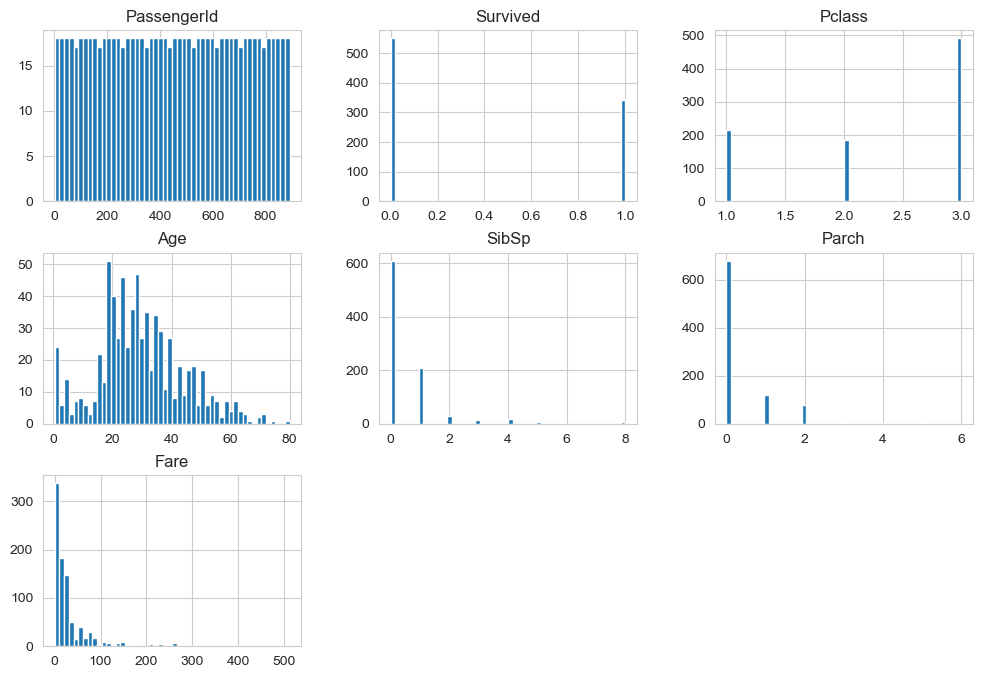

In [19]:
titanic.hist(bins=50, figsize=(12, 8))
plt.show()

### Dropping columns

We are going to work with those columns:
* PassengerId
* Survived (our label)
* Pclass
* Sex
* Age
* SibSp
* Parch
* Fare
* Embarked

We are dropping those columns:
* Name (the name does not depend on whether the person has survived or not)
* Ticket (too many different values)
* Cabin (too many null values)

In [20]:
titanic = titanic.drop(["Name", "Ticket", "Cabin"], axis=1)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Look for Correlations

C:\Users\hammd\AppData\Local\Temp\ipykernel_15100\2567827116.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr(),
C:\Users\hammd\AppData\Local\Temp\ipykernel_15100\2567827116.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(titanic.corr(), dtype=bool)),


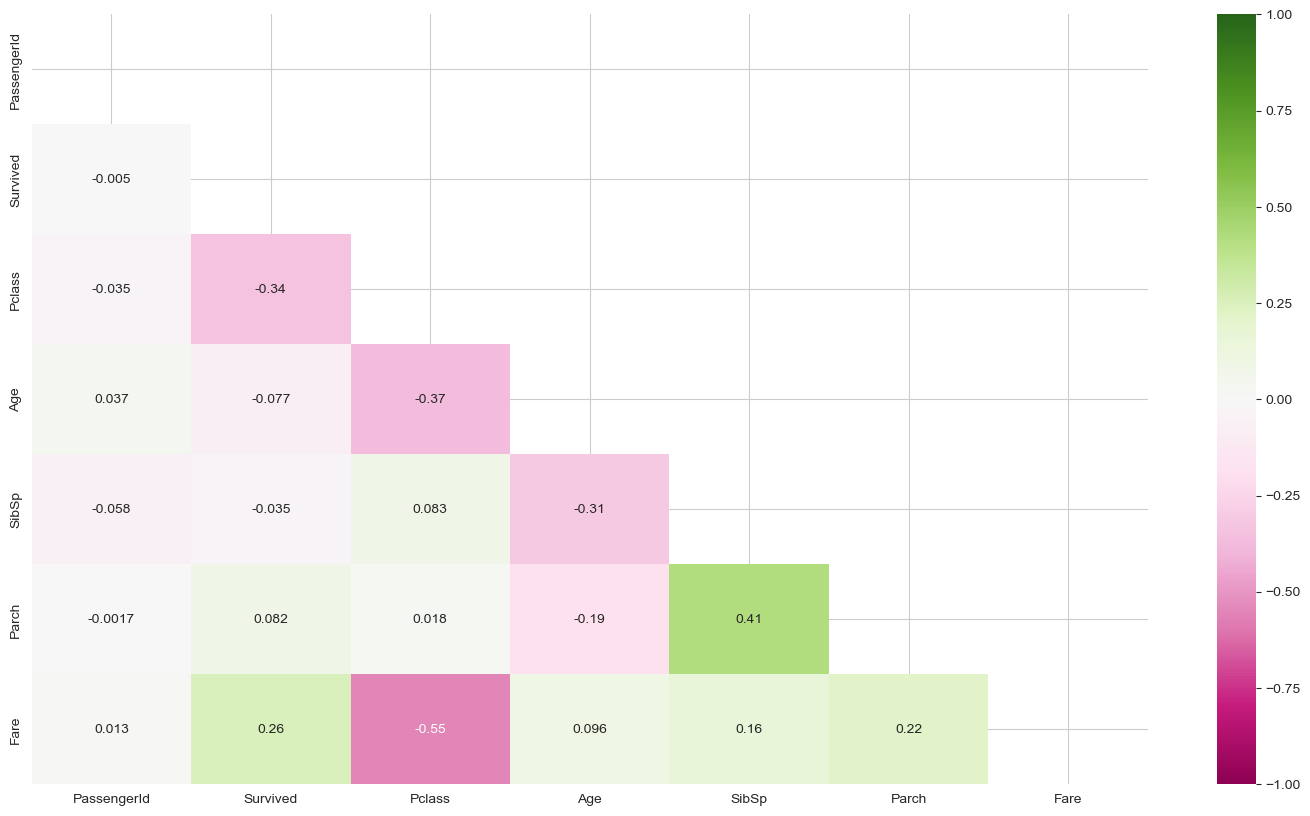

In [22]:
# Correlation between Numerical features
plt.figure(figsize=(18, 10))
sns.heatmap(
    titanic.corr(),
    mask=np.triu(np.ones_like(titanic.corr(), dtype=bool)),
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
);

In [23]:
corr_matrix = titanic.corr(numeric_only=True)

In [24]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

We see two things:
* positive correlation between Survived and Fare: the higher the Fare, the rather Survived = 1 (people who have paid more rather survived than people who have paid less)
* negative correlation between Survived and Pclass: the lower the Pclass, the rather Survived = 1 (people in class 1 rather survived than people in class 3)

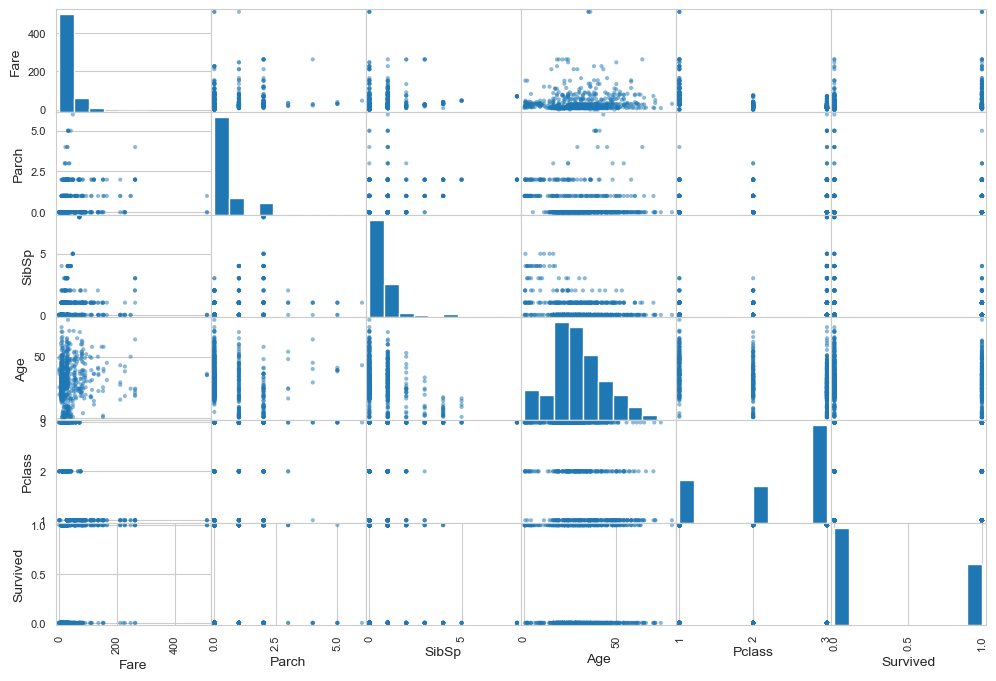

In [25]:
attributes_to_plot = ["Fare", "Parch", "SibSp", "Age", "Pclass", "Survived"]
scatter_matrix(titanic[attributes_to_plot], figsize=(12, 8))
plt.show()

We cannot gain a lot of insights here - let's look at only two variables.

<Axes: xlabel='Age', ylabel='Fare'>

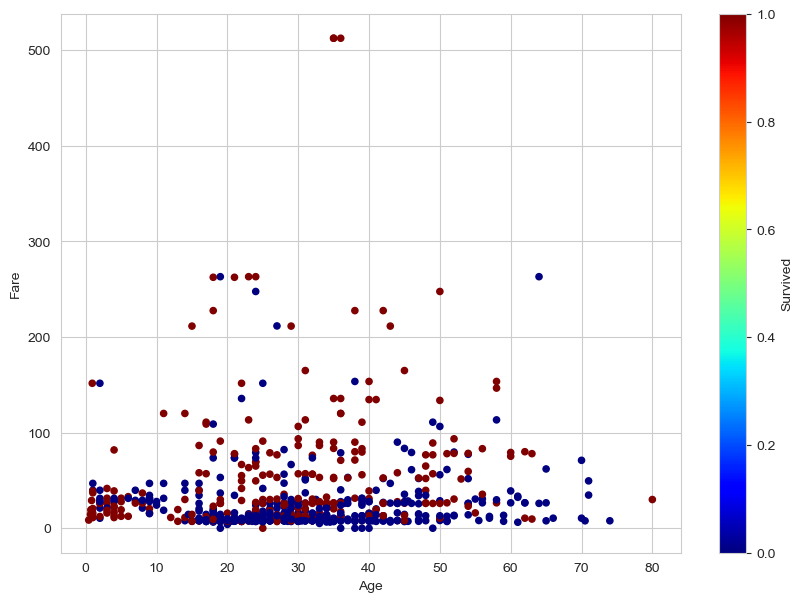

In [26]:
titanic.plot(kind="scatter", x="Age", y="Fare", c="Survived", cmap="jet", figsize=(10,7), grid=True)

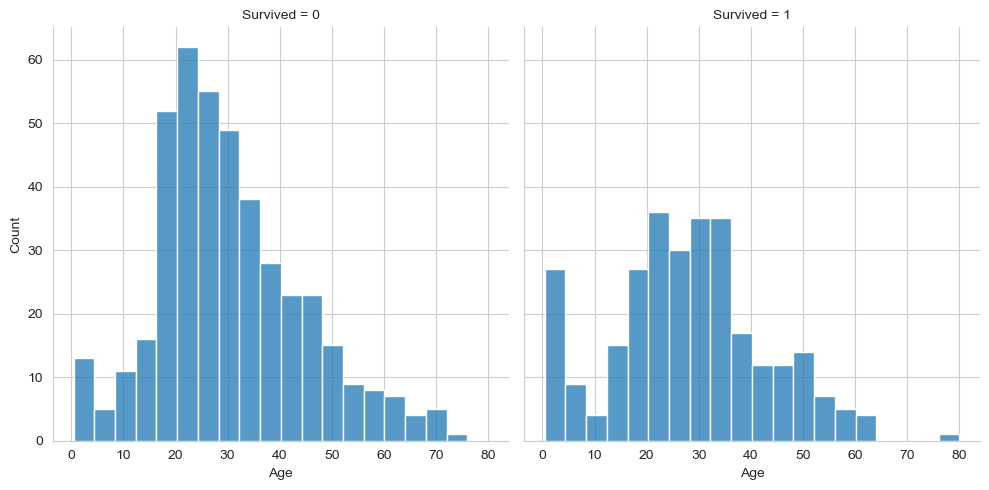

In [27]:
sns.displot(data=titanic, x='Age', col='Survived')

Show a diagram for the age:

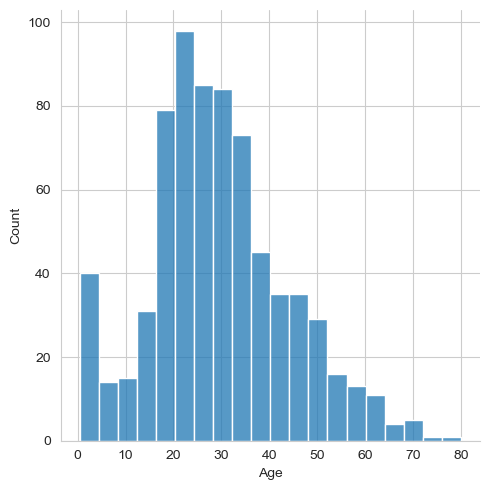

In [28]:
sns.displot(data=titanic["Age"])

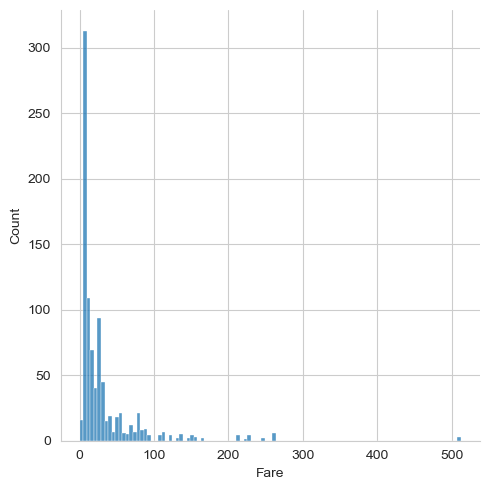

In [29]:
sns.displot(data=titanic["Fare"])

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


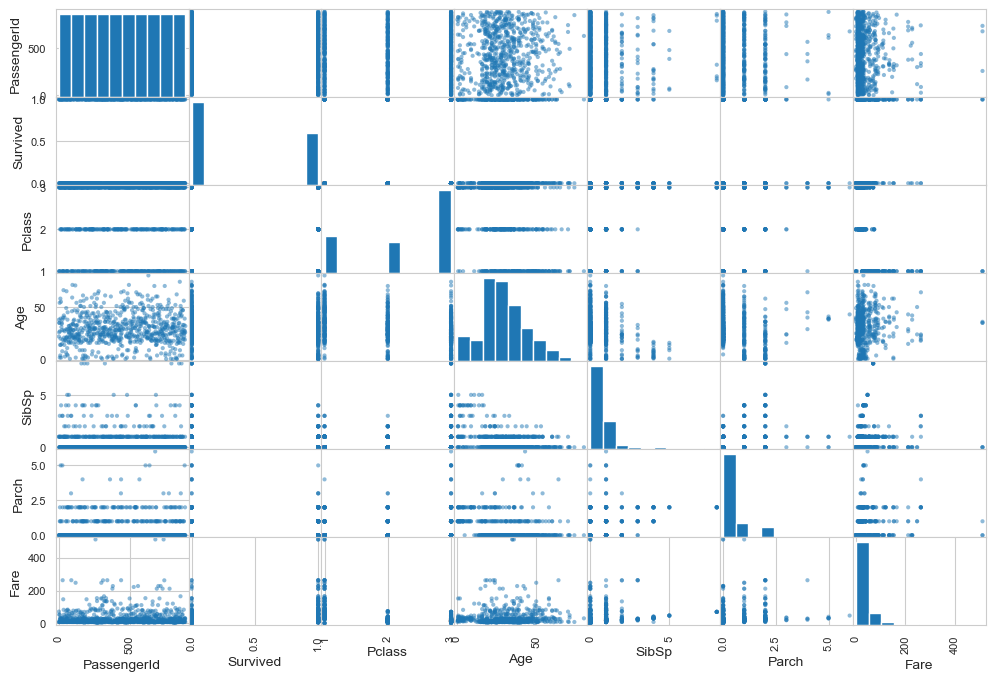

In [31]:
scatter_matrix(titanic, figsize=(12, 8))
plt.show()